# Load colormap from `.jscm` file

Colormap made using `vscm` tool (https://github.com/matplotlib/viscm) based off of this work https://bids.github.io/colormap/

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

In [4]:
import json
from matplotlib.colors import LinearSegmentedColormap

In [18]:
from matplotlib.colors import Colormap

In [23]:
LinearSegmentedColormap.from_list?

Signature: LinearSegmentedColormap.from_list(name, colors, N=256, gamma=1.0)
Docstring:
Create a `LinearSegmentedColormap` from a list of colors.

Parameters
----------
name : str
    The name of the colormap.
colors : array-like of colors or array-like of (value, color)
    If only colors are given, they are equidistantly mapped from the
    range :math:`[0, 1]`; i.e. 0 maps to ``colors[0]`` and 1 maps to
    ``colors[-1]``.
    If (value, color) pairs are given, the mapping is from *value*
    to *color*. This can be used to divide the range unevenly.
N : int
    The number of rgb quantization levels.
gamma : float
File:      ~/opt/miniconda3/envs/data/lib/python3.7/site-packages/matplotlib/colors.py
Type:      function


In [8]:
import numpy as np

In [14]:
data = np.random.rand(30,30)

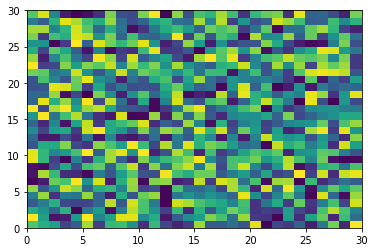

In [15]:
plt.pcolormesh(data)

### Looking around the `viscm` code I found the following color load lines at:
https://github.com/matplotlib/viscm/blob/e9c1f5336706634f8c90c69a99da69dd19c7c45b/viscm/gui.py#L926

In [50]:
fname = "bgr_mono_70.jscm"
with open(fname) as f:
    data = json.loads(f.read())
#     name = data["name"]
    name = fname.split(".")[0]
    colors = data["colors"]
    colors = [colors[i:i + 6] for i in range(0, len(colors), 6)]
    colors = [[int(c[2 * i:2 * i + 2], 16) / 255 for i in range(3)] for c in colors]
    cmap = mpl.colors.ListedColormap(colors, name)
    cmap_seg = mpl.colors.LinearSegmentedColormap(colors, name)
#     if "extensions" in data and "https://matplotlib.org/viscm" in data["extensions"]:
#         self.can_edit = True
#         self.params = {k:v for k,v in data["extensions"]["https://matplotlib.org/viscm"].items()
#                 if k in {"xp", "yp", "min_Jp", "max_Jp", "fixed", "filter_k", "uniform_space"}}
#         self.params["name"] = self.name
#         self.cmtype = data["extensions"]["https://matplotlib.org/viscm"]["cmtype"]
#         self.method = data["extensions"]["https://matplotlib.org/viscm"]["spline_method"]
#         self.uniform_space = data["extensions"]["https://matplotlib.org/viscm"]["uniform_colorspace"]

ValueError: not enough values to unpack (expected 2, got 0)

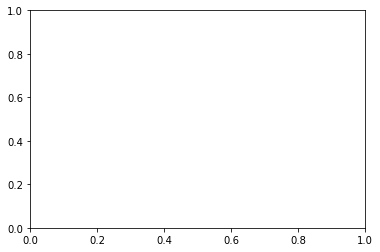

In [48]:
plt.pcolormesh(data, cmap=cmap_seg)